In [ ]:
## The code below aims to reduce the runtime of the normalisation function significantly - Author is ChatGPT

In [ ]:
print(datetime.now())

for curr_col in cols_to_norm:

    mean_name = curr_col + '_mean'
    std_name = curr_col + '_std'
    norm_name = curr_col + '_norm'

    print(mean_name, std_name, norm_name)

    ds_norm = df_base.groupby('@id_RACE')[curr_col].agg(['mean','std']).reset_index().rename(columns = {'mean':mean_name, 'std':std_name})

    df_base = df_base.merge(ds_norm, on='@id_RACE')

    # Check for rows with zero or NaN standard deviation
    zero_std_mask = (df_base[std_name] == 0) | (df_base[std_name].isna())

    # Normalize the column
    df_base[norm_name] = (df_base[curr_col] - df_base[mean_name]) / df_base[std_name]

    # Set the normalized value to 0 for rows with zero or NaN standard deviation
    df_base.loc[zero_std_mask, norm_name] = 0

    df_base.drop(columns=[mean_name, std_name], inplace=True)

    del ds_norm, mean_name, std_name, norm_name

print()
print(datetime.now())


# CONSOLIDATE DatePrep

In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:

DEBUG = True
seed = 1919


In [6]:
pd.set_option('display.max_rows', 50);

In [7]:
pd.set_option('display.max_columns', 50);

In [8]:
pd.set_option('display.width', 200);

In [9]:


# Import the Base Dataset
base_dataset_name = 'dataset_base_2023-02-09.csv'

keep_cols_for_join = ['@id_DOG','@id_RACE','TrainerId']

df_base_raw = pd.read_csv(f'{fileloc}/{base_dataset_name}')[keep_cols_for_join]

print(df_base_raw.shape)
print()
print(df_base_raw.columns.values.tolist())



(641710, 3)

['@id_DOG', '@id_RACE', 'TrainerId']


In [10]:

print(pd.DataFrame(df_base_raw.isna().sum()).transpose())


   @id_DOG  @id_RACE  TrainerId
0        0         0          0


In [11]:
# Import the Speed Profile

speed_profile_name = 'dataprep_speed_profile_2023-02-22.csv'

df_speed_profile = pd.read_csv(f'{fileloc}/{speed_profile_name}')

print(df_speed_profile.shape)
print()
print(df_speed_profile.columns.values.tolist())
print()


(641710, 32)

['@id_DOG', 'Handicap_DOG', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist']



In [12]:

print(pd.DataFrame(df_speed_profile.isna().sum()).transpose())


   @id_DOG  Handicap_DOG  RaceBox  Rating  DogGrade  DogGOBIS  DogPRIZE  @id_RACE  RaceTimeDateUTC   GOBIS  Hurdle  Handicap_RACE     TAB  GradeCode  racetime_fix  x_races_tot  x_dist_gp  \
0        0        641710     1861       0         0      1861      1861         0            41207  641710  641710         641710  445100          0         41207            0          0   

   x_runtm_gp  x_rtgp_prev  x_rtgp_avg  x_rtgp_min  x_rtgp_max  x_rtgp_range  x_rtgp_std  x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  x_speed_max  x_speed_range  x_speed_std  \
0           0            0           0           0           0             0           0                0             0            0            0            0              0            0   

   x_no_prev_r_in_dist  
0                    0  


In [13]:

"""
# Import the Race Profile
race_profile_name = 'dataprep_raceprofile_2022-12-03.csv'

df_race_profile = pd.read_csv(f'{fileloc}/{race_profile_name}')

print(df_race_profile.shape)
print()
print(df_race_profile.columns.values.tolist())
"""


"\n# Import the Race Profile\nrace_profile_name = 'dataprep_raceprofile_2022-12-03.csv'\n\ndf_race_profile = pd.read_csv(f'{fileloc}/{race_profile_name}')\n\nprint(df_race_profile.shape)\nprint()\nprint(df_race_profile.columns.values.tolist())\n"

In [14]:

#print(pd.DataFrame(df_race_profile.isna().sum()).transpose())


In [15]:

"""
# Import the Race Profile
dateprep_categorical = 'dataprep_categorical_2022-12-03.csv'

df_categorical = pd.read_csv(f'{fileloc}/{dateprep_categorical}')

print(df_categorical.shape)
print()
print(df_categorical.columns.values.tolist())
"""


"\n# Import the Race Profile\ndateprep_categorical = 'dataprep_categorical_2022-12-03.csv'\n\ndf_categorical = pd.read_csv(f'{fileloc}/{dateprep_categorical}')\n\nprint(df_categorical.shape)\nprint()\nprint(df_categorical.columns.values.tolist())\n"

In [16]:

#print(pd.DataFrame(df_categorical.isna().sum()).transpose())


In [14]:

# Import the Performance Dataset
dateprep_perf = 'dataprep_performance_2023-02-22.csv'

df_perf = pd.read_csv(f'{fileloc}/{dateprep_perf}')

print(df_perf.shape)
print()
print(df_perf.columns.values.tolist())


(641710, 37)

['@id_DOG', 'Handicap_DOG', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct']


In [15]:

print(pd.DataFrame(df_perf.isna().sum()).transpose())


   @id_DOG  Handicap_DOG  RaceBox  Rating  DogGrade  DogGOBIS  DogPRIZE  @id_RACE  RaceTimeDateUTC   GOBIS  Hurdle  Handicap_RACE     TAB  GradeCode  racetime_fix  xr_races  xr_races_l5  xr_wins  \
0        0        641710     1861       0         0      1861      1861         0            41207  641710  641710         641710  445100          0         41207         0            0        0   

   xr_wins_pct  xr_wins_l5  xr_wins_l5_pct  xr_fin_t2  xr_finl5_t2  xr_fin_t2_pct  xr_finl5_t2_pct  xr_fin_last  xr_fin_last_pct  xr_finl5_last  xr_finl5_last_pct  xr_fin_last2  xr_fin_last2_pct  \
0            0           0               0          0            0              0                0            0                0              0                  0             0                 0   

   xr_finl5_last2  xr_finl5_last2_pct  xr_fin_plc  xr_fin_plc_pct  xr_finl5_plc  xr_finl5_plc_pct  
0               0                   0           0               0             0                 0  


In [16]:

# Import the Performance Dataset
dateprep_trnr_perf = 'dataprep_TRNR_performance_2023-02-22.csv'

df_trnr_perf = pd.read_csv(f'{fileloc}/{dateprep_trnr_perf}')

print(df_trnr_perf.shape)
print()
print(df_trnr_perf.columns.values.tolist())



(585147, 25)

['TrainerId', '@id_RACE', 'Event_Dt', 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'trnr_xr_fin_last', 'trnr_xr_fin_last2', 'trnr_xrl5_wins', 'trnr_xrl5_fin_plc', 'trnr_xrl5_fin_t2', 'trnr_xrl5_fin_last', 'trnr_xrl5_fin_last2', 'trnr_xr_wins_pct', 'trnr_xr_fin_t2_pct', 'trnr_xr_fin_plc_pct', 'trnr_xr_fin_last_pct', 'trnr_xr_fin_last2_pct']


In [17]:

print(pd.DataFrame(df_trnr_perf.isna().sum()).transpose())


   TrainerId  @id_RACE  Event_Dt  trnr_xr_races_tot  trnr_xr_races_tot_prev  trnr_wins_prev  trnr_fin_plc_prev  trnr_fin_t2_prev  trnr_fin_last_prev  trnr_fin_last2_prev  trnr_xr_wins  \
0          0         0         0                  0                       0               0                  0                 0                   0                    0             0   

   trnr_xr_fin_plc  trnr_xr_fin_t2  trnr_xr_fin_last  trnr_xr_fin_last2  trnr_xrl5_wins  trnr_xrl5_fin_plc  trnr_xrl5_fin_t2  trnr_xrl5_fin_last  trnr_xrl5_fin_last2  trnr_xr_wins_pct  \
0                0               0                 0                  0               0                  0                 0                   0                    0                 0   

   trnr_xr_fin_t2_pct  trnr_xr_fin_plc_pct  trnr_xr_fin_last_pct  trnr_xr_fin_last2_pct  
0                   0                    0                     0                      0  


In [18]:

"""
# Import the Grading Dataset
dateprep_grading = 'dataset_base_grading_2022-12-16.csv'

df_grading = pd.read_csv(f'{fileloc}/{dateprep_grading}')

print(df_grading.shape)
print()
print(df_grading.columns.values.tolist())
"""


"\n# Import the Grading Dataset\ndateprep_grading = 'dataset_base_grading_2022-12-16.csv'\n\ndf_grading = pd.read_csv(f'{fileloc}/{dateprep_grading}')\n\nprint(df_grading.shape)\nprint()\nprint(df_grading.columns.values.tolist())\n"

In [19]:

#print(pd.DataFrame(df_grading.isna().sum()).transpose())


#### Merging all the Dataset here

In [20]:

# Merge the datasets together
"""
print(df_base_raw.shape)
print(df_speed_profile.shape)
print(df_race_profile.shape)

print()
print()
df_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base0.shape)
print(df_base0.columns.values.tolist())

print()
print()
df_base1 = pd.merge( df_base0, df_race_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base1.shape)
print(df_base1.columns.values.tolist())

print()
print()
df_base2 = pd.merge( df_base1, df_categorical.drop(columns = ['DogName','Distance','x_dist_gp']), on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base2.shape)
print(df_base2.columns.values.tolist())

print()
print()
df_base3 = pd.merge( df_base2, df_perf, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base3.shape)
print(df_base3.columns.values.tolist())

print(datetime.now())
"""


"\nprint(df_base_raw.shape)\nprint(df_speed_profile.shape)\nprint(df_race_profile.shape)\n\nprint()\nprint()\ndf_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')\nprint(df_base0.shape)\nprint(df_base0.columns.values.tolist())\n\nprint()\nprint()\ndf_base1 = pd.merge( df_base0, df_race_profile, on = ['@id_DOG','@id_RACE'], how = 'left')\nprint(df_base1.shape)\nprint(df_base1.columns.values.tolist())\n\nprint()\nprint()\ndf_base2 = pd.merge( df_base1, df_categorical.drop(columns = ['DogName','Distance','x_dist_gp']), on = ['@id_DOG','@id_RACE'], how = 'left')\nprint(df_base2.shape)\nprint(df_base2.columns.values.tolist())\n\nprint()\nprint()\ndf_base3 = pd.merge( df_base2, df_perf, on = ['@id_DOG','@id_RACE'], how = 'left')\nprint(df_base3.shape)\nprint(df_base3.columns.values.tolist())\n\nprint(datetime.now())\n"

In [21]:

# Merge the datasets together

print(df_base_raw.shape)
print(df_speed_profile.shape)

print()
print()
df_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base0.shape)
print(df_base0.columns.values.tolist())


print(df_perf.shape)

print()
print()
df_base1 = pd.merge( df_base0, df_perf, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base1.shape)
print(df_base1.columns.values.tolist())

print()
print(datetime.now())


(641710, 3)
(641710, 32)


(641710, 33)
['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_DOG', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist']
(641710, 37)


(641710, 68)
['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_DOG_x', 'RaceBox_x', 'Rating_x', 'DogGrade_x', 'DogGOBIS_x', 'DogPRIZE_x', 'RaceTimeDateUTC_x', 'GOBIS_x', 'Hurdle_x', 'Handicap_RACE_x', 'TAB_x', 'GradeCode_x', 'racetime_fix_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std',

In [22]:

print(datetime.now())

print()
print()
df_base = pd.merge( df_base1, df_trnr_perf, on = ['TrainerId','@id_RACE'], how = 'left')
print(df_base.shape)
print(df_base.columns.values.tolist())

print()
print(datetime.now())


2023-02-22 22:04:15.821355


(641710, 91)
['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_DOG_x', 'RaceBox_x', 'Rating_x', 'DogGrade_x', 'DogGOBIS_x', 'DogPRIZE_x', 'RaceTimeDateUTC_x', 'GOBIS_x', 'Hurdle_x', 'Handicap_RACE_x', 'TAB_x', 'GradeCode_x', 'racetime_fix_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'Handicap_DOG_y', 'RaceBox_y', 'Rating_y', 'DogGrade_y', 'DogGOBIS_y', 'DogPRIZE_y', 'RaceTimeDateUTC_y', 'GOBIS_y', 'Hurdle_y', 'Handicap_RACE_y', 'TAB_y', 'GradeCode_y', 'racetime_fix_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'x

In [23]:

del df_base0, df_base1


In [24]:

print(pd.DataFrame(df_base.isna().sum()).transpose())


   @id_DOG  @id_RACE  TrainerId  Handicap_DOG_x  RaceBox_x  Rating_x  DogGrade_x  DogGOBIS_x  DogPRIZE_x  RaceTimeDateUTC_x  GOBIS_x  Hurdle_x  Handicap_RACE_x   TAB_x  GradeCode_x  racetime_fix_x  \
0        0         0          0          641710       1861         0           0        1861        1861              41207   641710    641710           641710  445100            0           41207   

   x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  x_rtgp_avg  x_rtgp_min  x_rtgp_max  x_rtgp_range  x_rtgp_std  ...  xr_finl5_plc  xr_finl5_plc_pct  Event_Dt  trnr_xr_races_tot  \
0            0          0           0            0           0           0           0             0           0  ...             0                 0         0                  0   

   trnr_xr_races_tot_prev  trnr_wins_prev  trnr_fin_plc_prev  trnr_fin_t2_prev  trnr_fin_last_prev  trnr_fin_last2_prev  trnr_xr_wins  trnr_xr_fin_plc  trnr_xr_fin_t2  trnr_xr_fin_last  \
0                       0               0     

### Normalising the x_speed_prev in Each RaceId

In [25]:

"""
NOTE:
    When mean is 0 created flag - No Prev Races
    When std is 0 create flag - No Std
    
Q Sau takke ka sawaal ? 
    Missing Norm values be replaced with 0 or 0.5.
        Currently used 0.5    

print(datetime.now())

ds_norm = df_base1.groupby('@id_RACE')['x_speed_prev'].agg( ['mean','std'] ).reset_index().rename(columns = {'mean':'x_speed_prev_mean', 'std':'x_speed_prev_std'} )

df_base1 = df_base1.merge( ds_norm , on = '@id_RACE' )
df_base1['x_no_speed_prev_std'] = df_base1['x_speed_prev_std'].apply(lambda x : 1 if x == 0 else 0 )

df_base1['x_speed_prev_norm'] = (df_base1['x_speed_prev'] - df_base1['x_speed_prev_mean']) / df_base1['x_speed_prev_std']
df_base1['x_speed_prev_norm'] = df_base1.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1) 
#df_base1['x_speed_prev_norm'] = df_base1['x_speed_prev_norm'].fillna(0.5)

"""

print(datetime.now())


2023-02-22 22:04:16.476279


In [26]:

# QC the Transformation

print(pd.DataFrame(df_base.isna().sum()).transpose())
qc_missing = pd.DataFrame(df_base.isna().sum())

#qc_missing.to_csv()
qc_missing.to_csv(f'{fileloc}/missing.csv', index = False)

#df_base2.groupby('x_no_prev_races')['x_speed_prev_std'].isna().sum()
#df_base2.groupby('x_no_prev_races')[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.isna().sum())
#df_base1.groupby(['x_no_prev_races','x_no_speed_prev_std'])[['x_speed_prev_mean', 'x_speed_prev_std']].apply(lambda x: x.eq(0).sum())


   @id_DOG  @id_RACE  TrainerId  Handicap_DOG_x  RaceBox_x  Rating_x  DogGrade_x  DogGOBIS_x  DogPRIZE_x  RaceTimeDateUTC_x  GOBIS_x  Hurdle_x  Handicap_RACE_x   TAB_x  GradeCode_x  racetime_fix_x  \
0        0         0          0          641710       1861         0           0        1861        1861              41207   641710    641710           641710  445100            0           41207   

   x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  x_rtgp_avg  x_rtgp_min  x_rtgp_max  x_rtgp_range  x_rtgp_std  ...  xr_finl5_plc  xr_finl5_plc_pct  Event_Dt  trnr_xr_races_tot  \
0            0          0           0            0           0           0           0             0           0  ...             0                 0         0                  0   

   trnr_xr_races_tot_prev  trnr_wins_prev  trnr_fin_plc_prev  trnr_fin_t2_prev  trnr_fin_last_prev  trnr_fin_last2_prev  trnr_xr_wins  trnr_xr_fin_plc  trnr_xr_fin_t2  trnr_xr_fin_last  \
0                       0               0     

In [27]:

print(df_base.columns.values.tolist())


['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_DOG_x', 'RaceBox_x', 'Rating_x', 'DogGrade_x', 'DogGOBIS_x', 'DogPRIZE_x', 'RaceTimeDateUTC_x', 'GOBIS_x', 'Hurdle_x', 'Handicap_RACE_x', 'TAB_x', 'GradeCode_x', 'racetime_fix_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'Handicap_DOG_y', 'RaceBox_y', 'Rating_y', 'DogGrade_y', 'DogGOBIS_y', 'DogPRIZE_y', 'RaceTimeDateUTC_y', 'GOBIS_y', 'Hurdle_y', 'Handicap_RACE_y', 'TAB_y', 'GradeCode_y', 'racetime_fix_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_

In [28]:

print(len(df_base.columns.values.tolist()))


91


In [29]:
"""

['@id_DOG', '@id_RACE', 'TrainerId'\
    , 'x_races_tot'\
    --, 'x_dist_gp'\
    , 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std'\
    --, 'x_no_prev_races'\
    , 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range'\
    -- , 'x_speed_std', 'x_no_prev_r_in_dist'\
    , 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct'\
    --, 'Event_Dt'\
    , 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'trnr_xr_fin_last', 'trnr_xr_fin_last2', 'trnr_xrl5_wins', 'trnr_xrl5_fin_plc', 'trnr_xrl5_fin_t2', 'trnr_xrl5_fin_last', 'trnr_xrl5_fin_last2'\
    , 'trnr_xr_wins_pct', 'trnr_xr_fin_t2_pct', 'trnr_xr_fin_plc_pct', 'trnr_xr_fin_last_pct', 'trnr_xr_fin_last2_pct']

"""

cols_to_norm = [\
    'x_races_tot'\
    , 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std'\
    , 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range'\
    , 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct'\
    , 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'trnr_xr_fin_last', 'trnr_xr_fin_last2', 'trnr_xrl5_wins', 'trnr_xrl5_fin_plc', 'trnr_xrl5_fin_t2', 'trnr_xrl5_fin_last', 'trnr_xrl5_fin_last2'\
    , 'trnr_xr_wins_pct', 'trnr_xr_fin_t2_pct', 'trnr_xr_fin_plc_pct', 'trnr_xr_fin_last_pct', 'trnr_xr_fin_last2_pct']

print(len(cols_to_norm))
print(datetime.now())


57
2023-02-22 22:04:18.238263


In [30]:


#df_base1['x_rtgp_prev'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg'].plot( kind='density', legend=True, figsize = (24,8) )



In [31]:

# Normalising multiple columns in loop

# 10 Minute-Runtime

print(datetime.now())

for curr_col in cols_to_norm:
    
    mean_name = curr_col + '_mean'
    std_name = curr_col + '_std'
    no_std_name = curr_col + '_std' + '_no'
    norm_name = curr_col + '_norm'
    
    print(mean_name, std_name, norm_name)

    ds_norm = df_base.groupby('@id_RACE')[curr_col].agg(['mean','std']).reset_index().rename(columns = {'mean':mean_name, 'std':std_name})

    df_base = df_base.merge(ds_norm , on = '@id_RACE')
    df_base[no_std_name] = df_base[std_name].apply(lambda x : 1 if x == 0 else 0)

    #df_base[norm_name] = (df_base[curr_col] - df_base[mean_name]) / df_base[std_name]
    #df_base['x_speed_prev_norm'] = df_base.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1)
    df_base[norm_name] = df_base.apply(lambda x : 0 if (x[mean_name] == 0) | (x[std_name] == 0) | (pd.isna(x[std_name])) else ( x[curr_col] - x[mean_name] ) / x[std_name], axis = 1)
    #df_base[norm_name] = df_base[norm_name].fillna(0.5)
    
    df_base.drop(columns = [mean_name, std_name, no_std_name], inplace = True)
    
    del ds_norm, mean_name, std_name, no_std_name, norm_name

print()
print(datetime.now())



2023-02-22 22:04:18.277484
x_races_tot_mean x_races_tot_std x_races_tot_norm
x_runtm_gp_mean x_runtm_gp_std x_runtm_gp_norm
x_rtgp_prev_mean x_rtgp_prev_std x_rtgp_prev_norm
x_rtgp_avg_mean x_rtgp_avg_std x_rtgp_avg_norm
x_rtgp_min_mean x_rtgp_min_std x_rtgp_min_norm
x_rtgp_max_mean x_rtgp_max_std x_rtgp_max_norm
x_rtgp_range_mean x_rtgp_range_std x_rtgp_range_norm
x_rtgp_std_mean x_rtgp_std_std x_rtgp_std_norm
x_speed_prev_mean x_speed_prev_std x_speed_prev_norm
x_speed_avg_mean x_speed_avg_std x_speed_avg_norm
x_speed_min_mean x_speed_min_std x_speed_min_norm
x_speed_max_mean x_speed_max_std x_speed_max_norm
x_speed_range_mean x_speed_range_std x_speed_range_norm
xr_races_mean xr_races_std xr_races_norm
xr_races_l5_mean xr_races_l5_std xr_races_l5_norm
xr_wins_mean xr_wins_std xr_wins_norm
xr_wins_pct_mean xr_wins_pct_std xr_wins_pct_norm
xr_wins_l5_mean xr_wins_l5_std xr_wins_l5_norm
xr_wins_l5_pct_mean xr_wins_l5_pct_std xr_wins_l5_pct_norm
xr_fin_t2_mean xr_fin_t2_std xr_fin_t2_no

In [32]:

print(df_base.columns.values.tolist())


['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_DOG_x', 'RaceBox_x', 'Rating_x', 'DogGrade_x', 'DogGOBIS_x', 'DogPRIZE_x', 'RaceTimeDateUTC_x', 'GOBIS_x', 'Hurdle_x', 'Handicap_RACE_x', 'TAB_x', 'GradeCode_x', 'racetime_fix_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'Handicap_DOG_y', 'RaceBox_y', 'Rating_y', 'DogGrade_y', 'DogGOBIS_y', 'DogPRIZE_y', 'RaceTimeDateUTC_y', 'GOBIS_y', 'Hurdle_y', 'Handicap_RACE_y', 'TAB_y', 'GradeCode_y', 'racetime_fix_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_

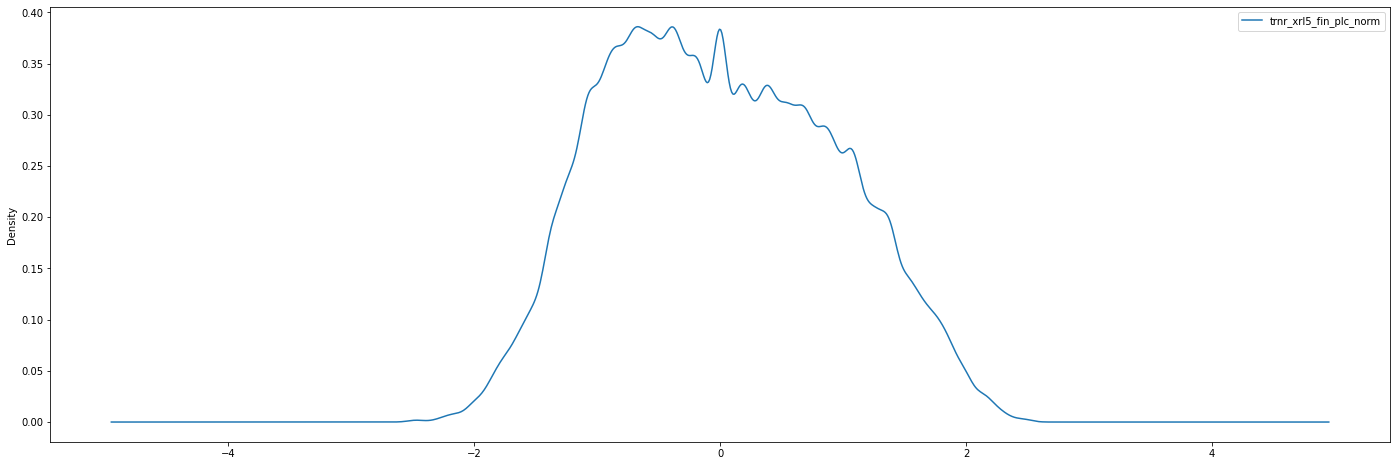

In [33]:

#df_base['x_races_tot_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_max_norm'].plot( kind='density', legend=True, figsize = (24,8) )

#df_base['y_margin'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['xr_wins_pct_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['xr_finl5_last2_pct'].plot( kind='density', legend=True, figsize = (24,8) )

df_base['trnr_xrl5_fin_plc_norm'].plot( kind='density', legend=True, figsize = (24,8) )


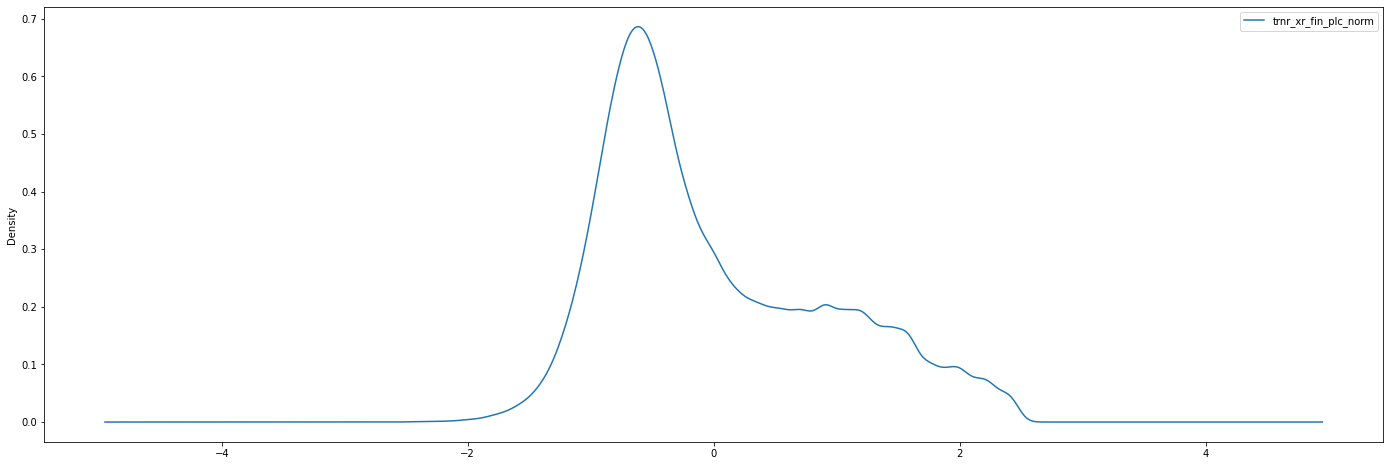

In [34]:

df_base['trnr_xr_fin_plc_norm'].plot( kind='density', legend=True, figsize = (24,8) )


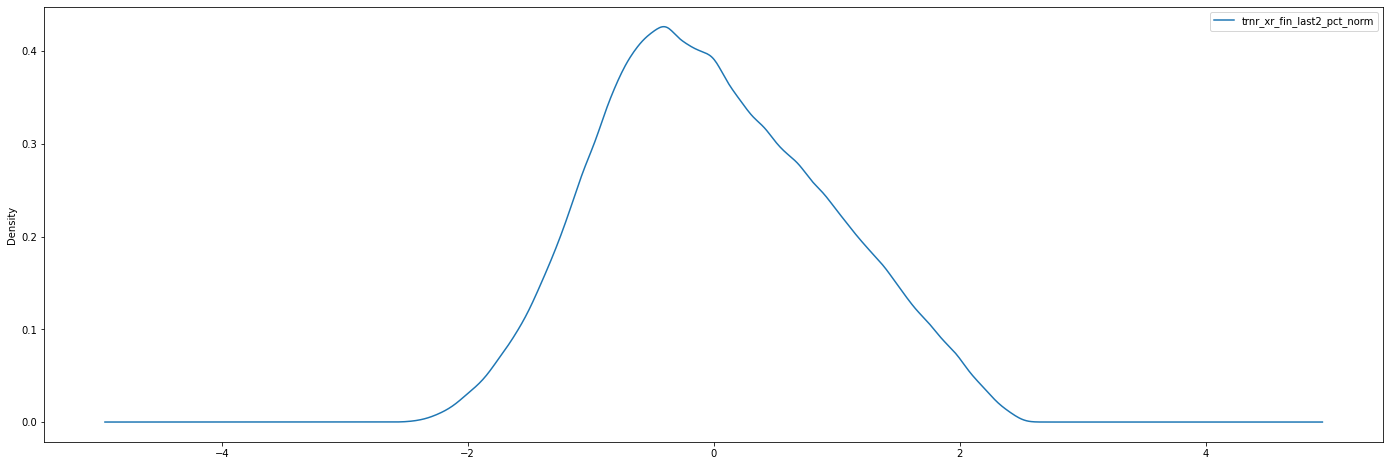

In [35]:

df_base['trnr_xr_fin_last2_pct_norm'].plot( kind='density', legend=True, figsize = (24,8) )


In [36]:

print(df_base.columns.values.tolist())


['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_DOG_x', 'RaceBox_x', 'Rating_x', 'DogGrade_x', 'DogGOBIS_x', 'DogPRIZE_x', 'RaceTimeDateUTC_x', 'GOBIS_x', 'Hurdle_x', 'Handicap_RACE_x', 'TAB_x', 'GradeCode_x', 'racetime_fix_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'Handicap_DOG_y', 'RaceBox_y', 'Rating_y', 'DogGrade_y', 'DogGOBIS_y', 'DogPRIZE_y', 'RaceTimeDateUTC_y', 'GOBIS_y', 'Hurdle_y', 'Handicap_RACE_y', 'TAB_y', 'GradeCode_y', 'racetime_fix_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_

#### EXPORTING THE MODEL FILE

In [37]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random']

#cols_for_drop = ['y_margin_y','y_pos_y']
cols_for_drop = []

#'Event_Dt', 

todaydt = datetime.now().date()
exp_fname = f'normalised_vars_{todaydt}.csv'

exp_ds = df_base.drop(columns = cols_for_drop).rename(columns = {'y_margin_x':'y_margin', 'y_pos_x':'y_pos'})


In [38]:

print(pd.DataFrame(exp_ds.isna().sum()))


                                 0
@id_DOG                          0
@id_RACE                         0
TrainerId                        0
Handicap_DOG_x              641710
RaceBox_x                     1861
...                            ...
trnr_xr_wins_pct_norm            0
trnr_xr_fin_t2_pct_norm          0
trnr_xr_fin_plc_pct_norm         0
trnr_xr_fin_last_pct_norm        0
trnr_xr_fin_last2_pct_norm       0

[148 rows x 1 columns]


In [39]:

print(exp_ds.shape)


(641710, 148)


In [40]:

print(exp_ds.columns.values.tolist())


['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_DOG_x', 'RaceBox_x', 'Rating_x', 'DogGrade_x', 'DogGOBIS_x', 'DogPRIZE_x', 'RaceTimeDateUTC_x', 'GOBIS_x', 'Hurdle_x', 'Handicap_RACE_x', 'TAB_x', 'GradeCode_x', 'racetime_fix_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_range', 'x_rtgp_std', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_range', 'x_speed_std', 'x_no_prev_r_in_dist', 'Handicap_DOG_y', 'RaceBox_y', 'Rating_y', 'DogGrade_y', 'DogGOBIS_y', 'DogPRIZE_y', 'RaceTimeDateUTC_y', 'GOBIS_y', 'Hurdle_y', 'Handicap_RACE_y', 'TAB_y', 'GradeCode_y', 'racetime_fix_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_

In [41]:

exp_ds.tail(5)


,@id_DOG,@id_RACE,TrainerId,Handicap_DOG_x,RaceBox_x,Rating_x,DogGrade_x,DogGOBIS_x,DogPRIZE_x,RaceTimeDateUTC_x,GOBIS_x,Hurdle_x,Handicap_RACE_x,TAB_x,GradeCode_x,racetime_fix_x,x_races_tot,x_dist_gp,x_runtm_gp,x_rtgp_prev,x_rtgp_avg,x_rtgp_min,x_rtgp_max,x_rtgp_range,x_rtgp_std,...,xr_fin_plc_pct_norm,xr_finl5_plc_norm,xr_finl5_plc_pct_norm,trnr_xr_races_tot_norm,trnr_xr_races_tot_prev_norm,trnr_wins_prev_norm,trnr_fin_plc_prev_norm,trnr_fin_t2_prev_norm,trnr_fin_last_prev_norm,trnr_fin_last2_prev_norm,trnr_xr_wins_norm,trnr_xr_fin_plc_norm,trnr_xr_fin_t2_norm,trnr_xr_fin_last_norm,trnr_xr_fin_last2_norm,trnr_xrl5_wins_norm,trnr_xrl5_fin_plc_norm,trnr_xrl5_fin_t2_norm,trnr_xrl5_fin_last_norm,trnr_xrl5_fin_last2_norm,trnr_xr_wins_pct_norm,trnr_xr_fin_t2_pct_norm,trnr_xr_fin_plc_pct_norm,trnr_xr_fin_last_pct_norm,trnr_xr_fin_last2_pct_norm
641705,1478450099,626240615,34868,NaN,7.0,91.0,5,N,10345.0,02 Jan 21 08:03AM,NaN,NaN,NaN,NaN,NG,19:03:00,0,300,18.077206,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.926687,1.581139,0,0.0,0.0,1.290994,1.290994,0,2.041241,2.041241,1.290994,1.290994,0,2.041241,2.041241,1.290994,1.290994,0,2.041241,2.041241,0.0,0.877747
641706,1701190008,626240615,47155,NaN,1.0,84.0,5,N,14705.0,02 Jan 21 08:03AM,NaN,NaN,NaN,NaN,NG,19:03:00,0,300,17.503676,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.550482,0.000000,0,0.0,0.0,-0.645497,-0.645497,0,-0.408248,-0.408248,-0.645497,-0.645497,0,-0.408248,-0.408248,-0.645497,-0.645497,0,-0.408248,-0.408248,0.0,-0.626962
641707,1907950051,626240615,28891,NaN,6.0,64.0,5,N,5890.0,02 Jan 21 08:03AM,NaN,NaN,NaN,NaN,NG,19:03:00,0,300,18.573529,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.275241,-1.581139,0,0.0,0.0,1.290994,1.290994,0,-0.408248,-0.408248,1.290994,1.290994,0,-0.408248,-0.408248,1.290994,1.290994,0,-0.408248,-0.408248,0.0,1.630102
641708,2035650008,626240615,55616,NaN,2.0,91.0,4,N,44720.0,02 Jan 21 08:03AM,NaN,NaN,NaN,NaN,NG,19:03:00,0,300,17.591912,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.550482,0.000000,0,0.0,0.0,-0.645497,-0.645497,0,-0.408248,-0.408248,-0.645497,-0.645497,0,-0.408248,-0.408248,-0.645497,-0.645497,0,-0.408248,-0.408248,0.0,-0.626962
641709,2116930017,626240615,36960,NaN,4.0,73.0,6,N,2350.0,02 Jan 21 08:03AM,NaN,NaN,NaN,NaN,NG,19:03:00,0,300,18.275735,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.550482,0.000000,0,0.0,0.0,-0.645497,-0.645497,0,-0.408248,-0.408248,-0.645497,-0.645497,0,-0.408248,-0.408248,-0.645497,-0.645497,0,-0.408248,-0.408248,0.0,-0.626962


In [42]:

exp_ds.describe()


,@id_DOG,@id_RACE,TrainerId,Handicap_DOG_x,RaceBox_x,Rating_x,DogPRIZE_x,GOBIS_x,Hurdle_x,Handicap_RACE_x,x_races_tot,x_dist_gp,x_runtm_gp,x_rtgp_prev,x_rtgp_avg,x_rtgp_min,x_rtgp_max,x_rtgp_range,x_rtgp_std,x_no_prev_races,x_speed_prev,x_speed_avg,x_speed_min,x_speed_max,x_speed_range,...,xr_fin_plc_pct_norm,xr_finl5_plc_norm,xr_finl5_plc_pct_norm,trnr_xr_races_tot_norm,trnr_xr_races_tot_prev_norm,trnr_wins_prev_norm,trnr_fin_plc_prev_norm,trnr_fin_t2_prev_norm,trnr_fin_last_prev_norm,trnr_fin_last2_prev_norm,trnr_xr_wins_norm,trnr_xr_fin_plc_norm,trnr_xr_fin_t2_norm,trnr_xr_fin_last_norm,trnr_xr_fin_last2_norm,trnr_xrl5_wins_norm,trnr_xrl5_fin_plc_norm,trnr_xrl5_fin_t2_norm,trnr_xrl5_fin_last_norm,trnr_xrl5_fin_last2_norm,trnr_xr_wins_pct_norm,trnr_xr_fin_t2_pct_norm,trnr_xr_fin_plc_pct_norm,trnr_xr_fin_last_pct_norm,trnr_xr_fin_last2_pct_norm
count,6.417100e+05,6.417100e+05,641710.000000,0.0,639849.000000,641710.000000,6.398490e+05,0.0,0.0,0.0,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,...,6.417100e+05,6.417100e+05,6.417100e+05,6.417100e+05,6.417100e+05,641710.0,6.417100e+05,6.417100e+05,6.417100e+05,6.417100e+05,641710.0,6.417100e+05,6.417100e+05,6.417100e+05,6.417100e+05,641710.0,6.417100e+05,6.417100e+05,6.417100e+05,6.417100e+05,641710.0,6.417100e+05,6.417100e+05,6.417100e+05,6.417100e+05
mean,4.716331e+08,7.486843e+08,110851.114122,NaN,4.585473,81.945313,1.393480e+04,NaN,NaN,NaN,19.056468,415.144233,24.302123,24.066283,24.026817,23.681201,24.491434,0.810233,0.311760,0.043931,16351.639608,16348.115700,15847.797766,16756.955849,909.114151,...,7.593759e-18,2.989376e-18,8.495574e-18,-1.453285e-19,-6.262965e-20,0.0,4.020581e-18,2.809511e-18,3.860547e-18,2.715912e-18,0.0,1.209341e-19,1.089964e-20,2.612452e-19,2.069201e-19,0.0,2.936846e-18,2.115394e-18,4.261930e-18,1.721450e-18,0.0,1.313320e-18,4.957604e-18,2.044287e-18,6.669885e-18
std,1.172652e+08,6.927769e+07,77738.478215,NaN,2.432556,28.141374,2.566634e+04,NaN,NaN,NaN,16.772309,78.124826,4.646788,5.147218,4.843409,4.805440,4.915439,0.705791,0.196567,0.204942,3529.976232,3518.869628,3432.391727,3632.950317,690.263730,...,9.220063e-01,9.201537e-01,9.202519e-01,9.278593e-01,9.278283e-01,0.0,9.023886e-01,8.795337e-01,7.585519e-01,8.796799e-01,0.0,9.276007e-01,9.274032e-01,9.269814e-01,9.275553e-01,0.0,9.268032e-01,9.262826e-01,9.209070e-01,9.264382e-01,0.0,9.274100e-01,9.276074e-01,9.238661e-01,9.275654e-01
min,1.083910e+08,6.238619e+08,6418.000000,NaN,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN,0.000000,-999.000000,-62.082592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,0.0,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,0.0,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,0.0,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,0.0,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00
25%,4.077278e+08,6.892971e+08,65398.000000,NaN,2.000000,84.000000,2.670000e+03,NaN,NaN,NaN,6.000000,350.000000,20.722059,20.621345,20.655511,20.380000,21.105479,0.380000,0.217155,0.000000,16803.118908,16881.596080,16311.235096,17241.379310,566.758857,...,-6.835067e-01,-7.071068e-01,-7.071068e-01,-7.019889e-01,-7.017623e-01,0.0,-7.245688e-01,-5.855400e-01,-4.082483e-01,-5.855400e-01,0.0,-6.947404e-01,-6.932164e-01,-6.974678e-01,-6.998750e-01,0.0,-7.245688e-01,-7.302967e-01,-7.245688e-01,-7.262730e-01,0.0,-6.954547e-01,-6.901641e-01,-6.833210e-01,-6.852216e-01
50%,4.654220e+08,7.506544e+08,99554.000000,NaN,4.000000,91.000000,7.698000e+03,NaN,NaN,NaN,15.000000,400.000000,23.673684,23.640000,23.575853,23.220513,24.108108,0.760000,0.290805,0.000000,17088.399606,17104.380403,16604.378003,17518.770111,880.345671,...,-1.115549e-01,-1.040313e-01,-8.770580e-02,-2.645614e-01,-2.641733e-

# 30 Min runtime

In [43]:

print(datetime.now())


2023-02-22 22:18:58.692181


In [ ]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [ ]:

print(datetime.now())
print()
print("THE END")


In [ ]:

print(exp_fname)
